In [6]:

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np




import moments_backend as est
import importlib
import noise as nois
import utils as utl
import optimisation as opt
import importlib
import os
importlib.reload(opt)
importlib.reload(est)
importlib.reload(nois)
importlib.reload(utl)

from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import EvalCallback
#import monitor
from stable_baselines3.common.monitor import Monitor



Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Time analysis failed


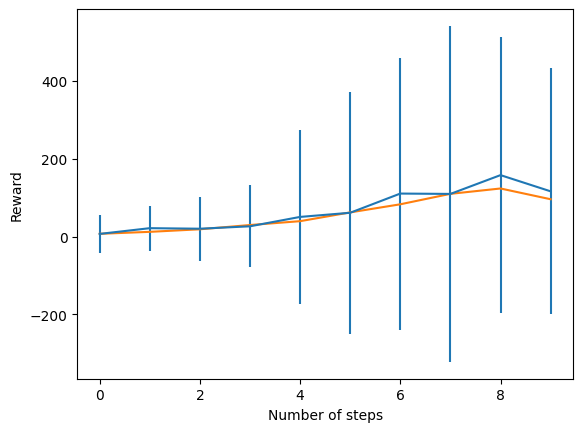

<Figure size 640x480 with 0 Axes>

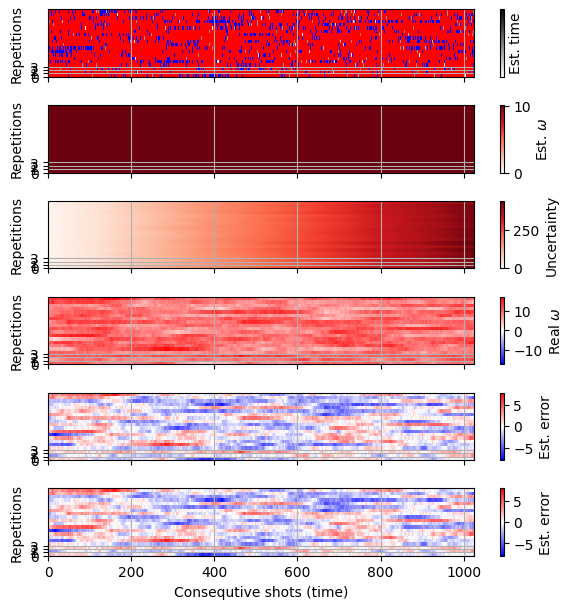

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

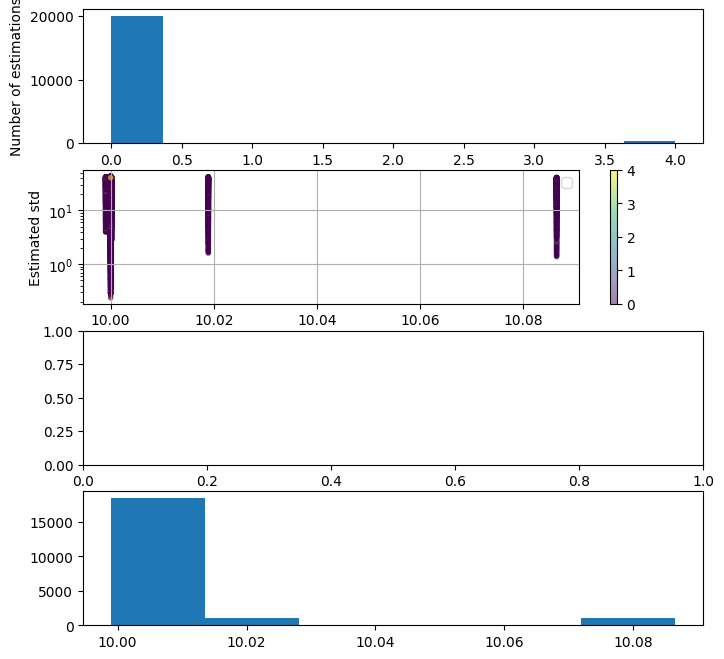

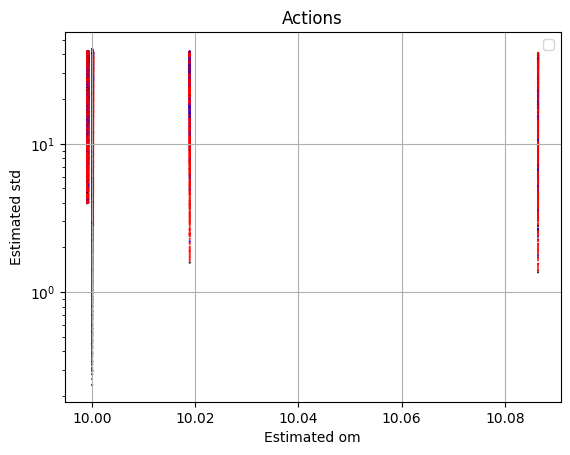

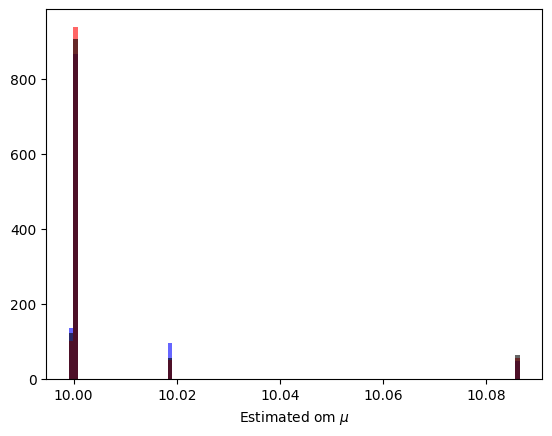

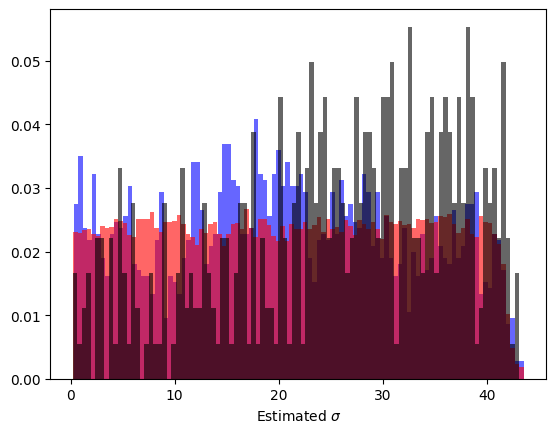

In [8]:

N = 20
results = [] 
om0 = 10
length = 1024 
ps = [5]
maxts = [50]
steps = [10]
stds = [0.005]
buffers = [1]

string_name = "tc_p_sig_step_maxt_std_buffer_"
plt.close()
 
tc = 100
sig = 2.5

for p in ps:
    for maxt in maxts:
        for step in steps:
            for std in stds:
                for buffer in buffers:
                    label = str(round(np.log10(tc),2))+"_"+str(p)+"_"+str(sig)+"_"+str(step)+"_"+str(maxt)+"_"+str(std)+"_"+str(buffer)
                    dir = f"./logs2/{string_name}{label}/"
                    
                    noiseou = nois.OU_noise(sigma=sig, gamma=1/tc)
                    env = est.Moments_estimation(length = length, 
                                                    om0 = om0, 
                                                    noise = noiseou,
                                                    max_time = maxt,
                                                    penalty = -p,
                                                    time_step = step,
                                                    min_time = step,
                                                    buffer_size = buffer,
                                                    std_step = std)
                    plt.figure()
                    utl.plot_learning_curve(dir)
                    path = dir
                  

                    model = PPO("MlpPolicy", env, 
                                n_steps = length,
                                batch_size=length,
                                verbose=1)
                    model = model.load(path+"best_model.zip")
                    res2 =  opt.game(N, env, model)
                    plt.figure()
                    utl.analyse_few_games4(res2, path+"/games.png")
                    #results.append(np.average(res2.rewards.sum(axis=1)))
                    plt.figure()
                    results.append(res2)
                    try:
                        utl.analyse_time(res2, path+"/time.png")
                    except ValueError:
                        print("Time analysis failed")
                    plt.figure()
                    utl.analyse_decisions(res2, path+"/decisions")
                    #create 4x4 subplots
                    fig, axs = plt.subplots(int(np.sqrt(N)), int(np.sqrt(N)), figsize=(15, 15))
                    #draw 16 integers from 0 to 50
                    for i, ax in enumerate(axs.flat):
                        ax.plot(res2.mus[i])
                        ax.plot(np.abs(res2.oms[i]))
                        ax.fill_between(np.arange(length), res2.mus[i] - res2.stds[i]*res2.mus[i], res2.mus[i] + res2.stds[i]*res2.mus[i], alpha=0.5)
                        ax.set_title(f"Draw = {i}")
                        #ax.set_ylim(0,50)
                    plt.savefig(path+"/trajectories.png")
                    plt.close()


In [7]:
# load npz file
npzfile = np.load(dir+"evaluations.npz")
# extract the two arrays
x = npzfile['results']



In [31]:
# got through all folders in logs2
params = []
values = []
for folder in os.listdir("./logs2"):
    # get the path
    path = f"./logs2/{folder}/"
    print(path)
    # load csv file decisionstats.csv using numpy
    try:
        data = np.genfromtxt(path+"decisionsstats.csv", delimiter=",", skip_header=1)
        values.append(data)
        params.append(folder)
    except:
        print("not found")

    

./logs2/.DS_Store/
not found
./logs2/tc_p_sig_step_maxt_std_buffer_2.0_5_2.5_10_50_0.001_2/
./logs2/tc_p_sig_step_maxt_std_buffer_2.0_5_2.5_10_50_0.005_2/
./logs2/tc_p_sig_step_maxt_std_buffer_2.0_5_2.5_1_100_0.001_2/
./logs2/tc_p_sig_step_maxt_std_buffer_2.0_5_2.5_1_50_0.001_1/
./logs2/tc_p_sig_step_maxt_std_buffer_2.0_5_2.5_1_50_0.005_1/
./logs2/tc_p_sig_step_maxt_std_buffer_2.0_5_2.5_10_50_0.001_1/
./logs2/tc_p_sig_step_maxt_std_buffer_2.0_5_2.5_10_50_0.005_1/
./logs2/tc_p_sig_step_maxt_std_buffer_2.0_5_2.5_1_100_0.001_1/
./logs2/tc_p_sig_step_maxt_std_buffer_2.0_5_2.5_1_50_0.001_2/
./logs2/tc_p_sig_step_maxt_std_buffer_2.0_5_2.5_1_50_0.005_2/


In [35]:
values=np.array(values)

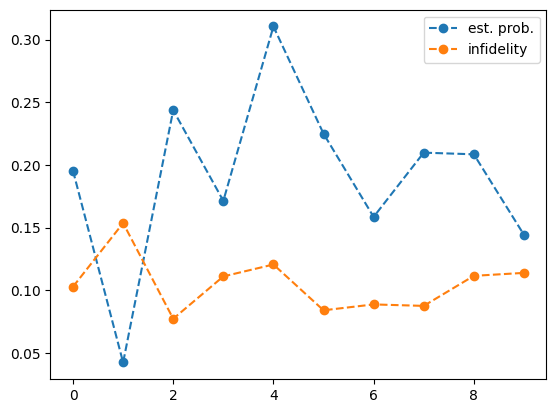

In [44]:
plt.plot(values[:,0], "--o", label = "est. prob.")
plt.plot(1-values[:,-1], "--o", label="infidelity")
plt.legend()

In [45]:
params[6]

'tc_p_sig_step_maxt_std_buffer_2.0_5_2.5_10_50_0.005_1'